<a href="https://colab.research.google.com/github/TruongScotl/LapTrinhPhanTichDuLieu/blob/main/Laptrinhphantichdulieu_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv('/content/dulieuxettuyendaihoc.csv', header=0, delimiter =',')
df.head(10)

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT
0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,NaN,2NT,3.25,3.25,4.50,A1
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,3.2,7.2,5.4,6.1,4.7,4.7,4.3,3.8,3.7,3.7,5.2,6.6,5.8,4.4,4.9,2.8,5.1,4.5,5.6,7.0,7.6,4.7,3.0,4.6,4.4,4.9,4.3,6.3,6.7,4.4,4.0,5.4,4.0,5.2,5.5,6.6,6.1,4.4,M,NaN,1,6.00,4.00,3.50,C
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,NaN,1,5.00,6.75,4.00,C
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,5.5,5.5,4.4,6.5,4.9,4.4,5.9,7.3,5.9,4.9,5.7,6.8,6.8,5.4,4.1,4.4,4.1,7.3,5.3,7.1,7.3,5.6,6.1,4.9,5.3,4.0,6.2,5.5,5.9,6.5,7.4,5.6,6.6,6.8,6.6,7.1,7.3,7.4,M,NaN,1,4.25,4.25,5.25,D1
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,5.9,7.5,6.5,6.9,7.6,6.4,7.6,7.6,6.7,6.6,5.7,7.9,7.4,7.3,4.4,6.5,5.6,8.3,6.2,4.9,8.6,7.7,6.8,5.4,4.7,5.0,5.1,7.0,7.0,6.3,8.0,6.2,6.8,6.9,6.6,6.1,7.5,7.2,M,NaN,2NT,4.25,4.50,5.00,A
5,6,9.3,7.6,7.9,8.6,7.0,7.3,7.7,7.9,9.6,7.8,8.0,8.7,7.7,8.0,9.2,9.1,7.1,8.5,8.1,8.7,7.2,8.4,7.7,8.2,8.5,8.5,7.7,9.2,8.0,6.6,7.3,8.8,8.5,7.6,8.1,9.0,8.4,6.6,6.6,8.2,7.8,6.4,7.2,7.7,7.7,5.7,8.0,7.8,M,NaN,1,1.50,4.00,6.00,D1
6,7,2.8,3.9,5.5,6.9,5.0,7.3,4.6,5.2,4.4,6.7,5.5,7.7,5.0,6.6,6.1,4.6,4.6,4.8,4.4,8.1,5.6,6.0,4.8,3.9,4.7,6.3,4.8,7.1,6.8,7.7,6.6,5.6,5.4,4.5,5.0,5.0,5.9,6.1,6.1,4.8,5.3,7.0,6.0,5.7,6.1,6.6,6.0,6.0,F,NaN,2,6.50,6.75,5.25,C
7,8,8.3,6.0,7.6,5.1,7.5,4.7,5.8,7.2,6.7,6.3,6.4,7.1,7.3,6.9,6.1,7.9,8.6,5.7,6.9,6.6,7.4,6.0,5.8,6.5,8.3,5.3,6.2,6.4,7.6,5.4,6.7,6.3,8.5,7.0,6.1,6.4,6.6,4.8,7.4,6.9,8.3,6.7,5.6,5.9,7.3,7.1,6.8,7.0,F,NaN,2,3.75,4.50,4.25,D1
8,9,6.5,6.3,7.6,6.0,5.5,7.1,6.3,5.0,7.3,6.8,7.3,6.5,6.4,7.9,7.6,3.7,6.4,6.7,6.7,7.3,6.2,6.1,8.2,5.7,8.1,6.0,6.3,7.8,7.2,7.6,8.5,5.7,7.7,7.5,8.8,6.5,5.6,5.6,7.1,6.7,7.7,8.7,8.9,7.5,6.0,9.1,7.9,6.1,F,NaN,1,3.50,3.50,6.75,D1
9,10,7.3,5.9,4.7,7.1,6.7,7.9,6.7,7.7,8.0,6.8,7.6,6.9,6.8,7.8,6.4,7.4,6.5,7.3,6.0,7.8,7.2,7.9,7.1,7.7,5.5,7.0,6.0,6.7,8.0,7.2,6.3,7.2,7.5,7.0,8.0,5.9,7.1,6.3,5.1,7.1,6.9,7.0,6.7,7.1,7.7,6.4,6.1,7.8,F,NaN,1,4.00,4.75,5.50,D1


In [3]:
X = df[['T1','H1','L1','S1','V1']] #indeependent variables
y = df.DH1 #dependent variable
print(X)
print(y)

     T1   H1   L1   S1   V1
0   7.2  6.3  7.3  7.3  7.0
1   5.4  3.9  3.9  4.0  5.4
2   5.6  7.2  6.8  7.5  4.3
3   6.6  5.3  6.4  6.9  5.4
4   6.0  6.0  5.0  7.3  6.5
..  ...  ...  ...  ...  ...
95  8.6  7.4  6.9  8.8  7.6
96  3.7  6.0  5.4  5.1  5.5
97  8.8  7.4  5.5  7.7  6.2
98  2.7  3.4  1.8  5.3  4.5
99  4.1  4.9  5.2  5.3  5.5

[100 rows x 5 columns]
0     3.25
1     6.00
2     5.00
3     4.25
4     4.25
      ... 
95    5.25
96    5.25
97    7.00
98    5.00
99    5.25
Name: DH1, Length: 100, dtype: float64


In [4]:
#Xử lý missing data and noise

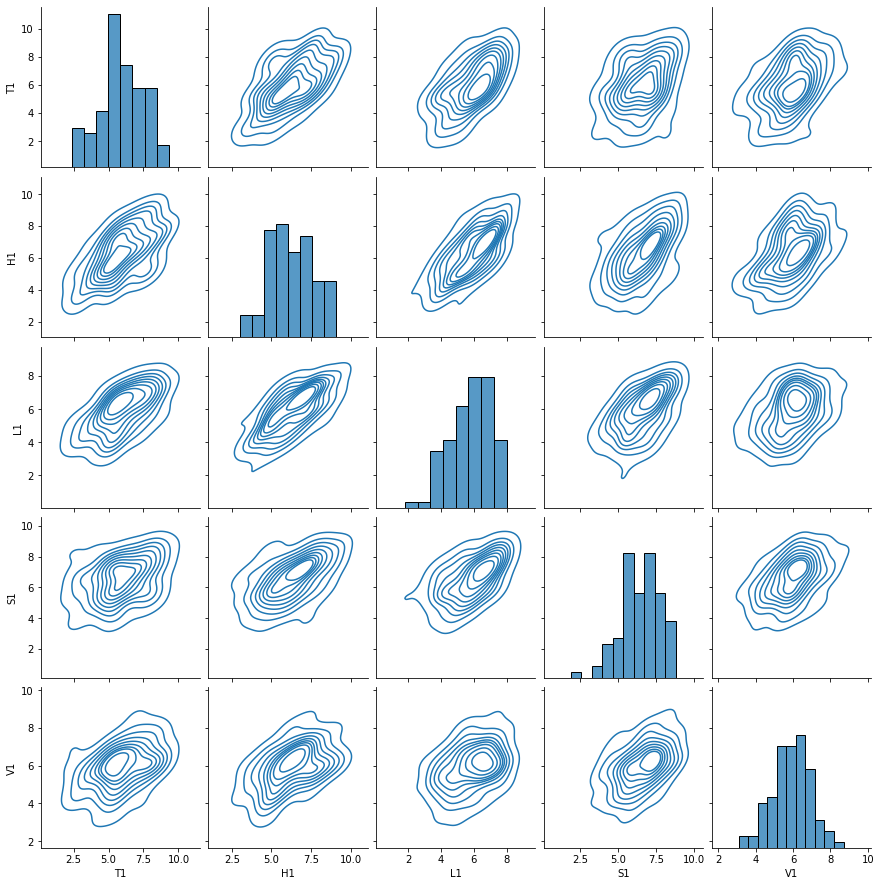

In [5]:
#Pairplot
import seaborn as sns
sns.pairplot(X , diag_kind='hist', kind ='kde')

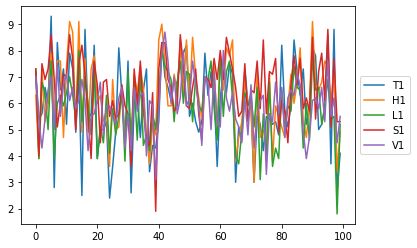

In [6]:
#Profile plot
ax = X.plot()
ax.legend(loc='center left', bbox_to_anchor = (1,0.5))

In [11]:
#Mo ta du lieu tung bien
print(X.describe())
# nhận thấy rằng độ lệch giữa std không nhiều, nếu nhiều -> nor, std

               T1          H1          L1          S1          V1
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean     5.946000    6.279000    5.824000    6.504000    5.920000
std      1.608338    1.423773    1.257713    1.273976    1.041658
min      2.400000    3.000000    1.800000    1.900000    3.100000
25%      5.000000    5.100000    4.975000    5.675000    5.375000
50%      5.850000    6.300000    5.900000    6.700000    6.050000
75%      7.200000    7.400000    6.825000    7.425000    6.600000
max      9.300000    9.100000    8.000000    8.800000    8.700000


In [8]:
#Ma tran tuong quan
print(X.corr())
print(X.cov())

          T1        H1        L1        S1        V1
T1  1.000000  0.602056  0.615248  0.378367  0.425652
H1  0.602056  1.000000  0.696362  0.541893  0.482968
L1  0.615248  0.696362  1.000000  0.528915  0.392920
S1  0.378367  0.541893  0.528915  1.000000  0.501014
V1  0.425652  0.482968  0.392920  0.501014  1.000000
          T1        H1        L1        S1        V1
T1  2.586752  1.378653  1.244541  0.775269  0.713111
H1  1.378653  2.027130  1.246974  0.982913  0.716283
L1  1.244541  1.246974  1.581842  0.847479  0.514768
S1  0.775269  0.982913  0.847479  1.623014  0.664869
V1  0.713111  0.716283  0.514768  0.664869  1.085051


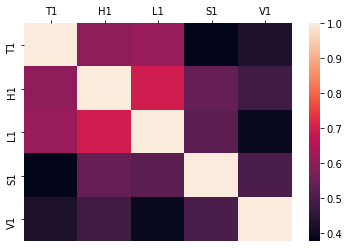

In [9]:
#Bieu do heatmap
sns.heatmap(X.corr(), vmax = 1., square=False).xaxis.tick_top()

In [10]:
#Normalize -> [0,1] linear combination & standard (khi std quá chênh lệch)
standardX = StandardScaler().fit_transform(X)
standardX = pd.DataFrame(standardX, index = X.index, columns = X.columns)
print(standardX)
print(standardX.apply(np.mean)) #tương đương với việc dùng thẳng ()
print(standardX.apply(np.std))

          T1        H1        L1        S1        V1
0   0.783615  0.014824  1.179471  0.627963  1.042032
1  -0.341191 -1.679330 -1.537467 -1.975402 -0.501719
2  -0.216213  0.650131  0.779921  0.785743 -1.563048
3   0.408679 -0.691074  0.460281  0.312404 -0.501719
4   0.033744 -0.196945 -0.658458  0.627963  0.559610
..       ...       ...       ...       ...       ...
95  1.658464  0.791311  0.859831  1.811311  1.620939
96 -1.403508 -0.196945 -0.338818 -1.107614 -0.405235
97  1.783442  0.791311 -0.258908  0.943523  0.270157
98 -2.028400 -2.032279 -3.215576 -0.949834 -1.370080
99 -1.153551 -0.973432 -0.498638 -0.949834 -0.405235

[100 rows x 5 columns]
T1   -3.508305e-16
H1    7.260859e-16
L1    1.387779e-16
S1    3.486100e-16
V1    6.383782e-17
dtype: float64
T1    1.0
H1    1.0
L1    1.0
S1    1.0
V1    1.0
dtype: float64


In [12]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 , random_state = 1)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(reg.intercept_)
coff_df = pd.DataFrame(reg.coef_, X_train.columns, columns = ['Cofficient'])
print(coff_df)

3.9834226668395396
    Cofficient
T1    0.069427
H1   -0.101604
L1   -0.102349
S1    0.242123
V1   -0.166291


In [20]:
# DH1 = 3.9834 + 0.069427*T1 -0.101604*H1 -0.102349*L1 + 0.2422123*S1 - 0.166291*V1